# Visualization trick for multivariate regression problems

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [3]:
# Load data
dataset = load_boston()
X, y = dataset.data, dataset.target
features = dataset.feature_names

In [4]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=0)


In [5]:
# Model
model = RandomForestRegressor(n_estimators = 750, max_depth = 5, criterion = 'mae', random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=750, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [6]:
# Creating the datasets
fit_results = pd.DataFrame(y_train)
fit_results.columns = ['Y_TRUE']
test_pred_results = pd.DataFrame(y_test)
test_pred_results.columns = ['Y_TRUE']

fit_results['Y_FIT'] = model.predict(X_train).ravel()
test_pred_results['Y_PRED'] = model.predict(X_test)

fit_results = fit_results.sort_values(by = ['Y_TRUE']).reset_index(drop = True)
test_pred_results = test_pred_results.sort_values(by = ['Y_TRUE']).reset_index(drop = True)

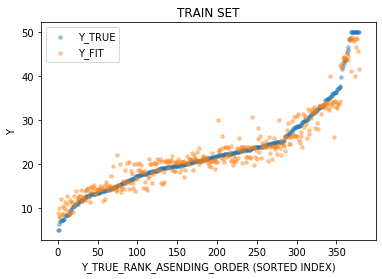

In [7]:
#### SCATTER PLOT - TRAIN
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.4, s = 12, label = 'Y_TRUE')
plt.scatter(fit_results.index,  fit_results['Y_FIT'], alpha = 0.4, s = 12, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TRAIN SET')
plt.legend()

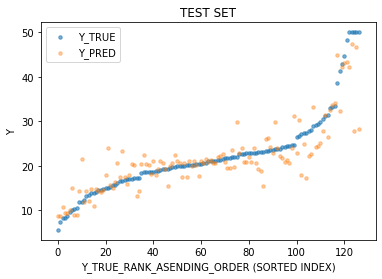

In [8]:
#### SCATTER PLOT - TEST
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.scatter(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.4, s = 12, label = 'Y_PRED')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TEST SET')
plt.legend()

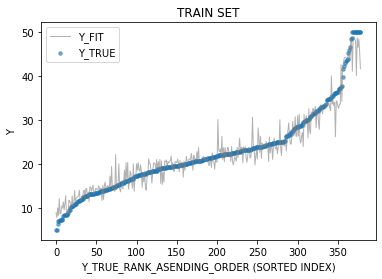

In [9]:
#### LINE PLOT - TRAIN
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.plot(fit_results.index,  fit_results['Y_FIT'], alpha = 0.6, color = 'grey', linewidth = 1, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TRAIN SET')
plt.legend()

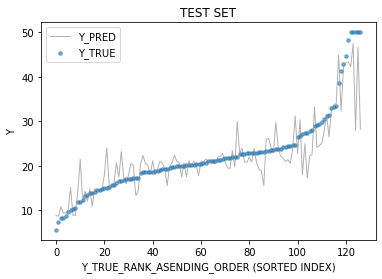

In [10]:
# LINE PLOT - TEST
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 12, label = 'Y_TRUE')
plt.plot(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.6, color = 'grey', linewidth = 1, label = 'Y_PRED')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.title('TEST SET')
plt.legend()

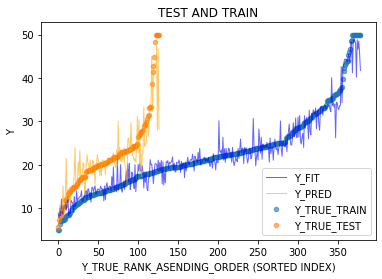

In [11]:
#### TRAIN AND TEST
plt.scatter(fit_results.index,  fit_results['Y_TRUE'], alpha = 0.6, s = 20, label = 'Y_TRUE_TRAIN')
plt.plot(fit_results.index,  fit_results['Y_FIT'], alpha = 0.6, color = 'blue', linewidth = 1, label = 'Y_FIT')
plt.xlabel('Y_TRUE_RANK_ASENDING_ORDER (SORTED INDEX)')
plt.ylabel('Y')
plt.scatter(test_pred_results.index,  test_pred_results['Y_TRUE'], alpha = 0.6, s = 20, label = 'Y_TRUE_TEST')
plt.plot(test_pred_results.index,  test_pred_results['Y_PRED'], alpha = 0.6, color = 'orange', linewidth = 1, label = 'Y_PRED')
plt.title('TEST AND TRAIN')
plt.legend()